# Facts About Indonesian Data Talents

> *Derived from [Kaggle 2020 Survey Dataset](https://www.kaggle.com/c/kaggle-survey-2020/data)*.

Below are the code scratches for my article on Medium.

In [1]:
import textwrap

import countrygroups
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("ggplot")

## Points at Issue

I always want to learn and improve my data science skills. Feeling of lack of anything makes me want to spend my free time to read articles, papers, try out something new, all about escalating my skills. Kaggle 2020 survey, like other previous Kaggle surveys, provides a view of the state of data science and machine learning. So, I presume I would get a better learning plan by analyzing the data, especially from Indonesian experts.

The main focus of this analysis is the state in Indonesia. However, it's also intriguing to cross-reference with other countries, like in South East Asia and the rest of the world.

* How are data scientists or machine learning engineers in Indonesia compared to other SEA countries and Global?
* What are the most used tools and platforms?
* How does someone should learn to break into the field of data science or machine learning?

In [2]:
df_kaggle = pd.read_csv("data/kaggle_survey_2020/kaggle_survey_2020_responses.csv")

# create mappings from column names to questions
with open("data/kaggle_survey_2020/kaggle_question_cols.json") as f:
    dict_kaggle_questions = json.load(f)

# drop questions in row 0
df_kaggle.drop(index=0, inplace=True)

df_kaggle.head()

/Users/syhamdani/.pyenv/versions/3.8.6/envs/kaggle/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We've already created a dictionary to map each column name to corresponding question. Using this, we are easier to know what columns consists of answers to what questions.

Now, for those questions with multiple choice, the corresponding columns have the word `Part` in its name. Let's define two subgroups of questions with only one answers and multiple choice.

In [3]:
list_single_answer_cols = df_kaggle.loc[:, ~df_kaggle.columns.str.contains("(?i)part|other")].columns.tolist()
list_multiple_answers_cols = df_kaggle.drop(columns=list_single_answer_cols).columns.tolist()

In [4]:
df_kaggle[list_single_answer_cols].head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q24,Q25,Q30,Q32,Q38
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999","$100,000 or more ($USD)",PostgresSQL,Microsoft Power BI,"Business intelligence software (Salesforce, Ta..."
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,R,A personal computer or laptop,Never,I do not use machine learning methods,"1000-9,999 employees",0,No (we do not use ML methods),"15,000-19,999",$0 ($USD),NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999","$10,000-$99,999",MySQL,NaN,"Local development environments (RStudio, Jupyt..."
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For early exploratory, let's find some missing values and plot some general characteristics in the survey dataset.

In [5]:
df_kaggle[list_single_answer_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Time from Start to Finish (seconds)  20036 non-null  object
 1   Q1                                   20036 non-null  object
 2   Q2                                   20036 non-null  object
 3   Q3                                   20036 non-null  object
 4   Q4                                   19569 non-null  object
 5   Q5                                   19277 non-null  object
 6   Q6                                   19120 non-null  object
 7   Q8                                   17821 non-null  object
 8   Q11                                  17029 non-null  object
 9   Q13                                  16780 non-null  object
 10  Q15                                  16374 non-null  object
 11  Q20                                  1140

Looks like there is no missing values from the first columns until the fourth. Missing values exist from Q4 until the last multiple choice question. For multiple selection questions, definitely contain missing values since they are scattered into one column for one selection. Hence, we don't interested in this.

In [6]:
num_missing_row_q4 = df_kaggle[df_kaggle.Q4.isna()].isna().sum(axis=0).unique().tolist()
num_missing_col_q4 = df_kaggle[df_kaggle.Q4.isna()].isna().sum(axis=1).unique().tolist()
print("Number of missing values in rows in Question 4 (highest level of formal education):", num_missing_row_q4)
print("Number of missing values in columns in Question 4 (highest level of formal education):", num_missing_col_q4)

Number of missing values in rows in Question 4 (highest level of formal education): [0, 467]
Number of missing values in columns in Question 4 (highest level of formal education): [351]


This one is interesting. The 467 rows of missing values (and only 467 rows) shows that all rows in other columns are missing. Also, since there are 351 missing values in each row, and we have 355 columns in total with the first 4 columns are complete, all the values in each column are missing. Therefore, we can **drop those rows**.

In [7]:
df_kaggle = df_kaggle.drop(index=df_kaggle[df_kaggle.Q4.isna()].index).reset_index(drop=True)

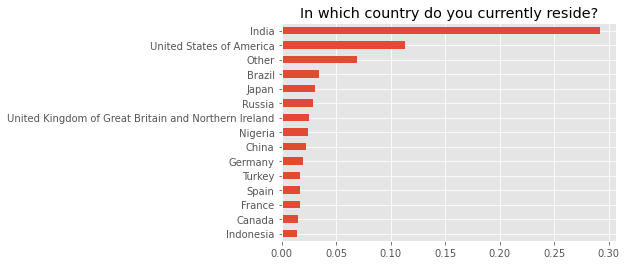

In [8]:
df_kaggle.Q3.value_counts(normalize=True).sort_values(ascending=False)[14::-1].plot(kind="barh")
plt.title(dict_kaggle_questions["Q3"])
plt.show()

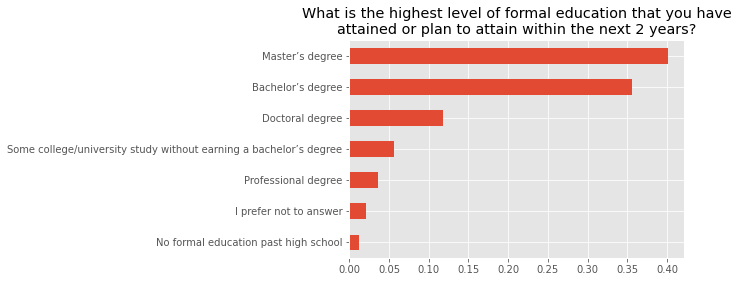

In [9]:
df_kaggle.Q4.value_counts(normalize=True).sort_values(ascending=False)[14::-1].plot(kind="barh")
plt.title(textwrap.fill(dict_kaggle_questions["Q4"], 60))
plt.show()

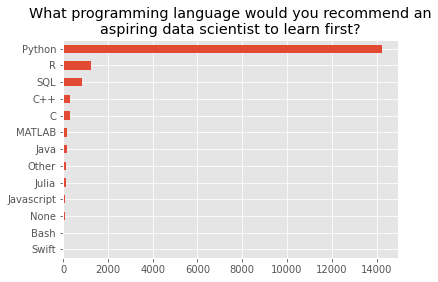

In [10]:
df_kaggle.Q8.value_counts().sort_values(ascending=False)[14::-1].plot(kind="barh")
plt.title(textwrap.fill(dict_kaggle_questions["Q8"].split(" - ")[0], 50))
plt.show()

From above figures, the respondents are dominated by those who have bachelor's and master's degree, with most of them reside in India. **Indonesia**, our main focus here, take the 15th position with less than 500 respondents. For those aspiring data scientist, according to this survey, you're encouraged to learn Python as your first weapon.

Some of this characteristics will act as a comparison to all Indonesian respondents's. We may add more characteristics as we look at more questions.

First, we split the data into 3 groups to suit our motivation, they are respondents who reside in **Indonesia**, **SEA country** other than Indonesia, and the rest country.

In [11]:
sea_country = countrygroups.UNSTATS_GEOGRAPHICAL_REGIONS.ASIA.SOUTH_EASTERN_ASIA.names
sea_country.remove("Indonesia")
print(sea_country)

['Brunei', 'Cambodia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam']


In [12]:
df_indonesia = df_kaggle[df_kaggle.Q3 == "Indonesia"]
print("Number of respondents reside in Indonesia:", len(df_indonesia))

df_sea = df_kaggle[df_kaggle.Q3.isin(sea_country)]
print("Number of respondents reside in Southeast Asia:", len(df_sea))

df_global = df_kaggle[~df_kaggle.Q3.isin(sea_country + ["Indonesia"])]
print("The rest respondents:", len(df_global))

# for visualization, we will add one column to df_kaggle to indicate those subgroups
def subgroups(country):
    if country == "Indonesia":
        return "indonesia"
    if country in sea_country:
        return "sea"
    return "global"

df_kaggle["subgroups"] = df_kaggle.Q3.apply(subgroups)

Number of respondents reside in Indonesia: 280
Number of respondents reside in Southeast Asia: 498
The rest respondents: 18791


## Data Talents in Indonesia Compared to Other SEA Countries and Global

In [13]:
indonesia_titles = df_indonesia.Q5.value_counts(normalize=True) * 100
sea_titles = df_sea.Q5.value_counts(normalize=True) * 100
global_titles = df_global.Q5.value_counts(normalize=True) * 100

all_groups_titles = [indonesia_titles, sea_titles, global_titles]
list_subgroups = ["indonesia", "sea", "global"]

<ipython-input-14-dda601068bea>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(group_title.index, rotation=90)


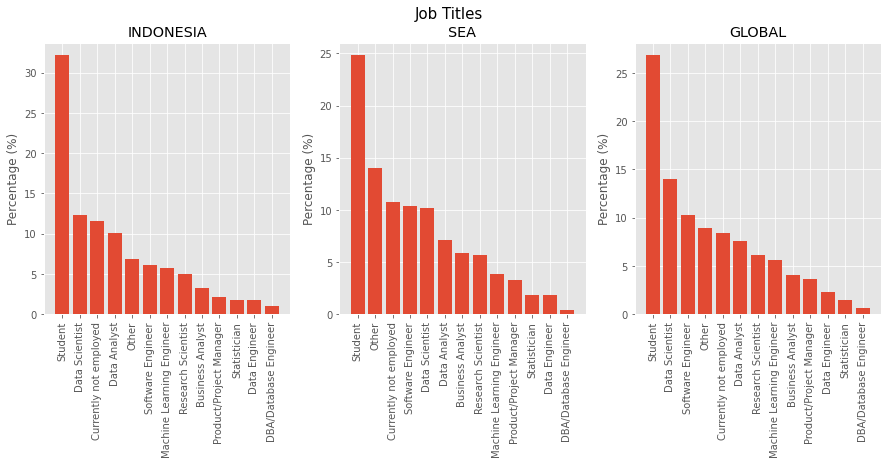

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, group_title, group in zip(axes, all_groups_titles, list_subgroups):
    ax.bar(
        x=group_title.index,
        height=group_title.values
    )
    ax.set_xticklabels(group_title.index, rotation=90)
    ax.set_ylabel("Percentage (%)")
    ax.set_title(group.upper())
plt.suptitle("Job Titles", fontsize=15)
plt.show()

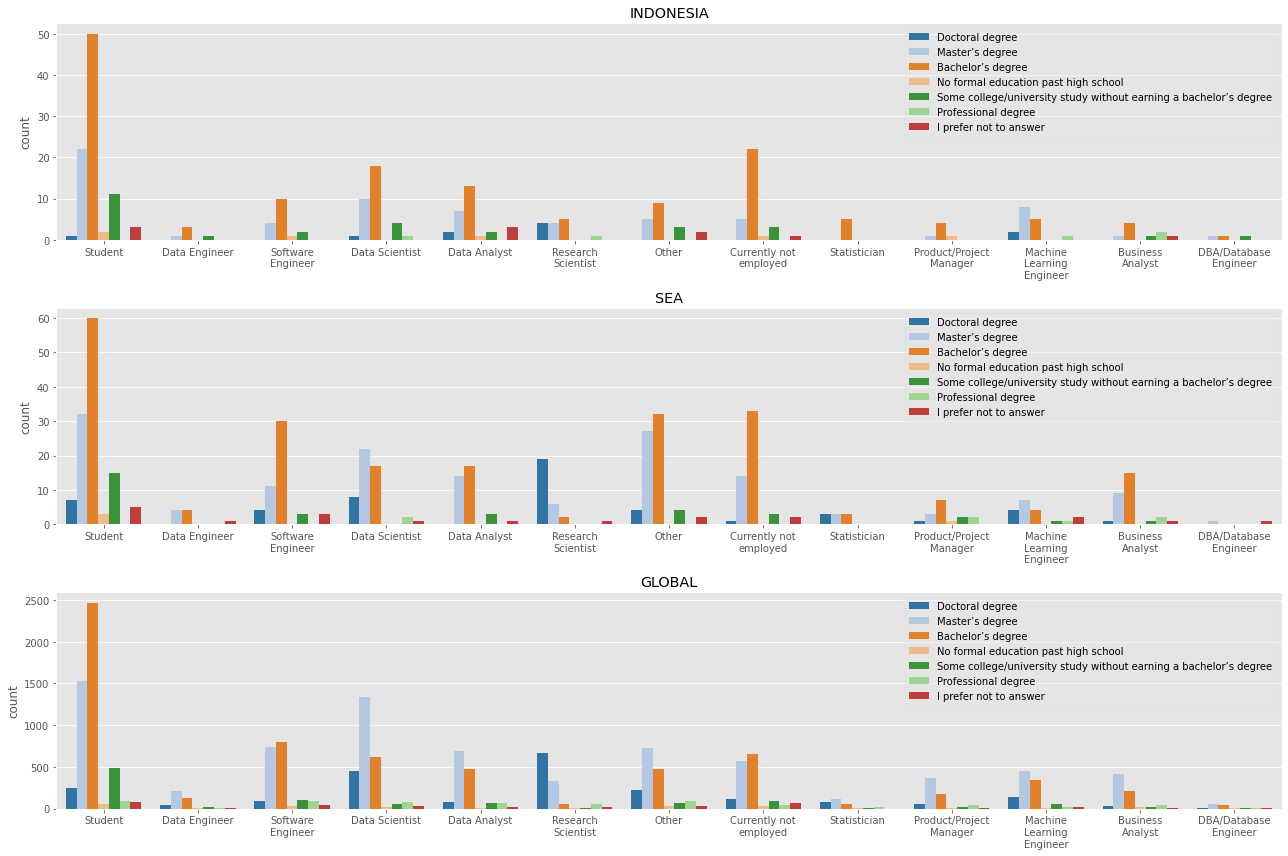

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(18, 12))
list_titles = df_kaggle.Q5.dropna().unique()
list_education = df_kaggle.Q4.dropna().unique()
for ax, df, group in zip(axes, list_df_subgroups:=[df_indonesia, df_sea, df_global], list_subgroups):
    plot = sns.countplot(data=df, x="Q5", order=list_titles,
                         palette="tab20", hue="Q4", hue_order=list_education, ax=ax)
    ax.set_title(group.upper())
    ax.set_xticklabels([textwrap.fill(title, 15) for title in list_titles])
    ax.set_xlabel(None)
    ax.legend(loc="upper right", fontsize="medium", framealpha=.3)
fig.tight_layout()
plt.show()

## Most Used Data Science Tools and Platform

In [16]:
list_ds_tools = ["Q7", "Q9", "Q10", "Q11", "Q14", "Q16", "Q36", "Q38"]
list_ds_question_title = [
    "What programming languages do you use on a regular basis?",
    "Which of the following integrated development environments (IDE's) do you use on a regular basis?",
    "Which of the following hosted notebook products do you use on a regular basis?",
    "What type of computing platform do you use most often for your data science projects?",
    "What data visualization libraries or tools do you use on a regular basis?",
    "Which of the following machine learning frameworks do you use on a regular basis?",
    "Where do you publicly share or deploy your data analysis or machine learning applications?",
    "What is the primary tool that you use at work or school to analyze data?",
]
list_col_tools = [col for col in df_kaggle.columns if col.split("_")[0] in list_ds_tools]
dict_ds_question_part = {
    question: [col for col in list_col_tools if question in col]
    for question in list_ds_tools
}

In [17]:
# function to visualize most used data science tools
def plot_most_used_tools(df, title="", figsize=(22, 15), height_space=1):
    fig = plt.figure(figsize=figsize)
    for idx, question in enumerate(list_ds_tools):
        plt.subplot(2, 4, idx+1)
        for col in dict_ds_question_part[question]:
            plt.bar(
                x=[textwrap.fill(label, 30) for label in df[col].value_counts().index],
                height=df[col].value_counts()
            )
            plt.xticks(rotation=90)
            plt.title(textwrap.fill(list_ds_question_title[idx], 35))
    plt.subplots_adjust(hspace=height_space)
    plt.suptitle(title, fontweight="bold", fontsize="x-large")
    plt.show()

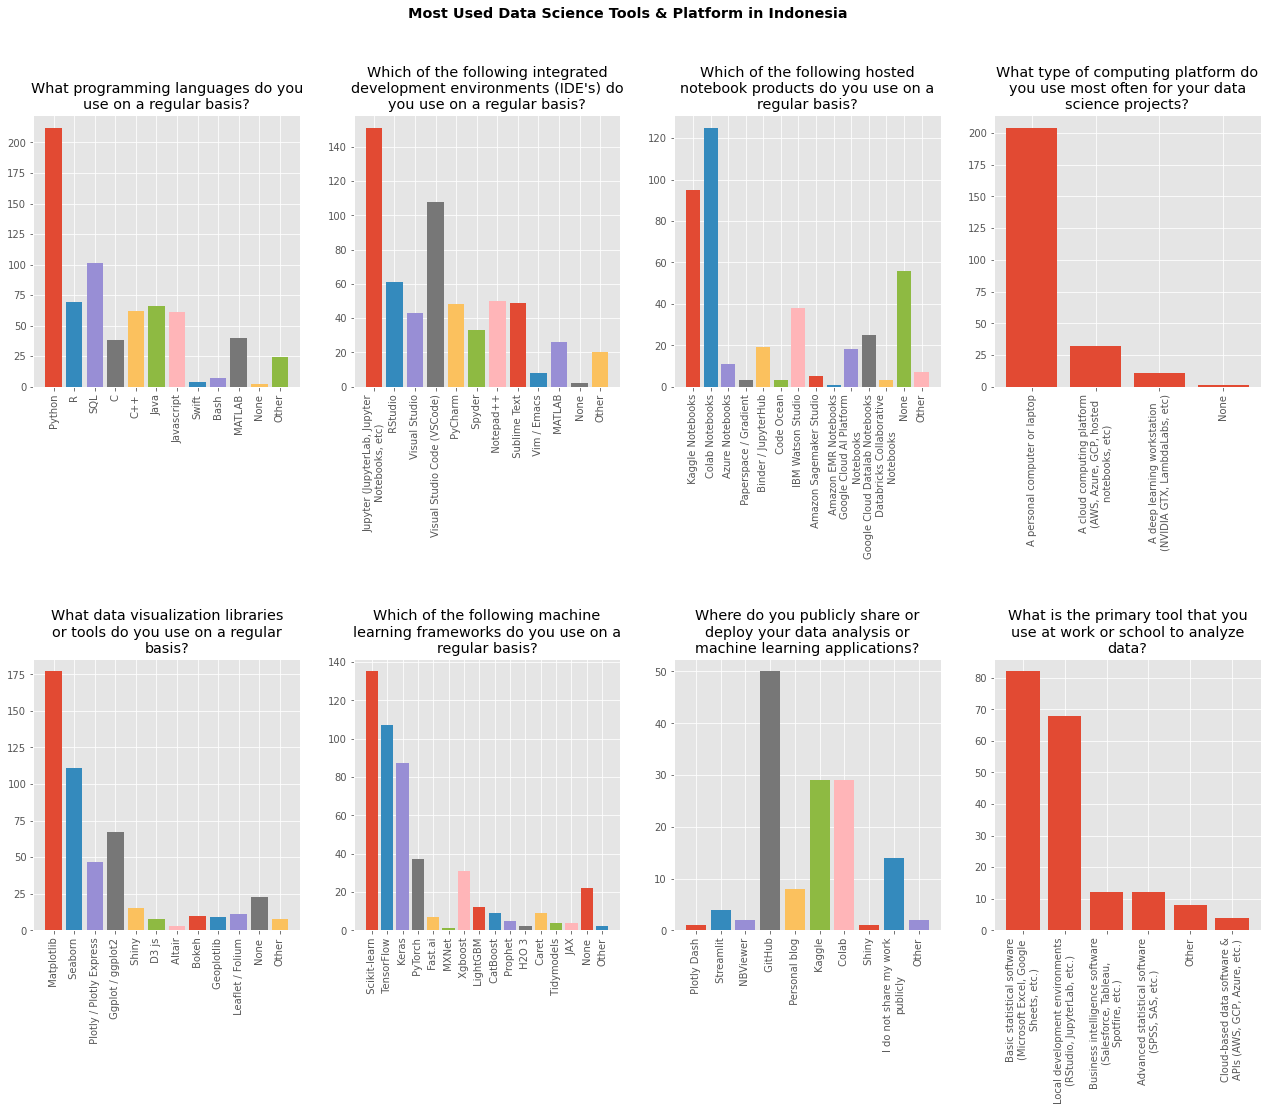

In [18]:
plot_most_used_tools(df_indonesia, "Most Used Data Science Tools & Platform in Indonesia")

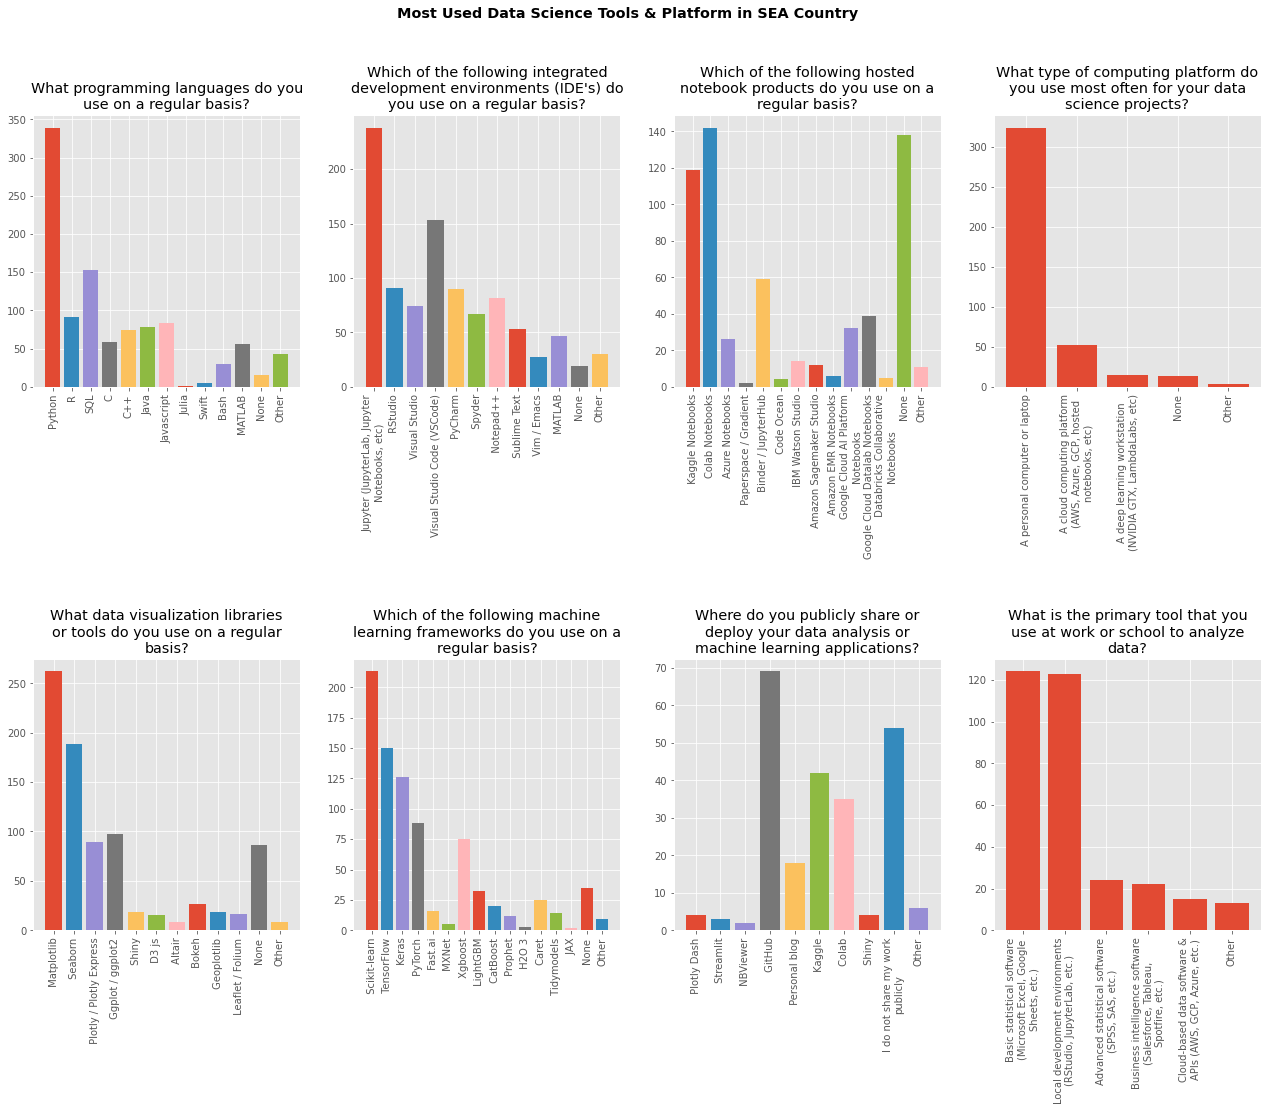

In [19]:
plot_most_used_tools(df_sea, "Most Used Data Science Tools & Platform in SEA Country")

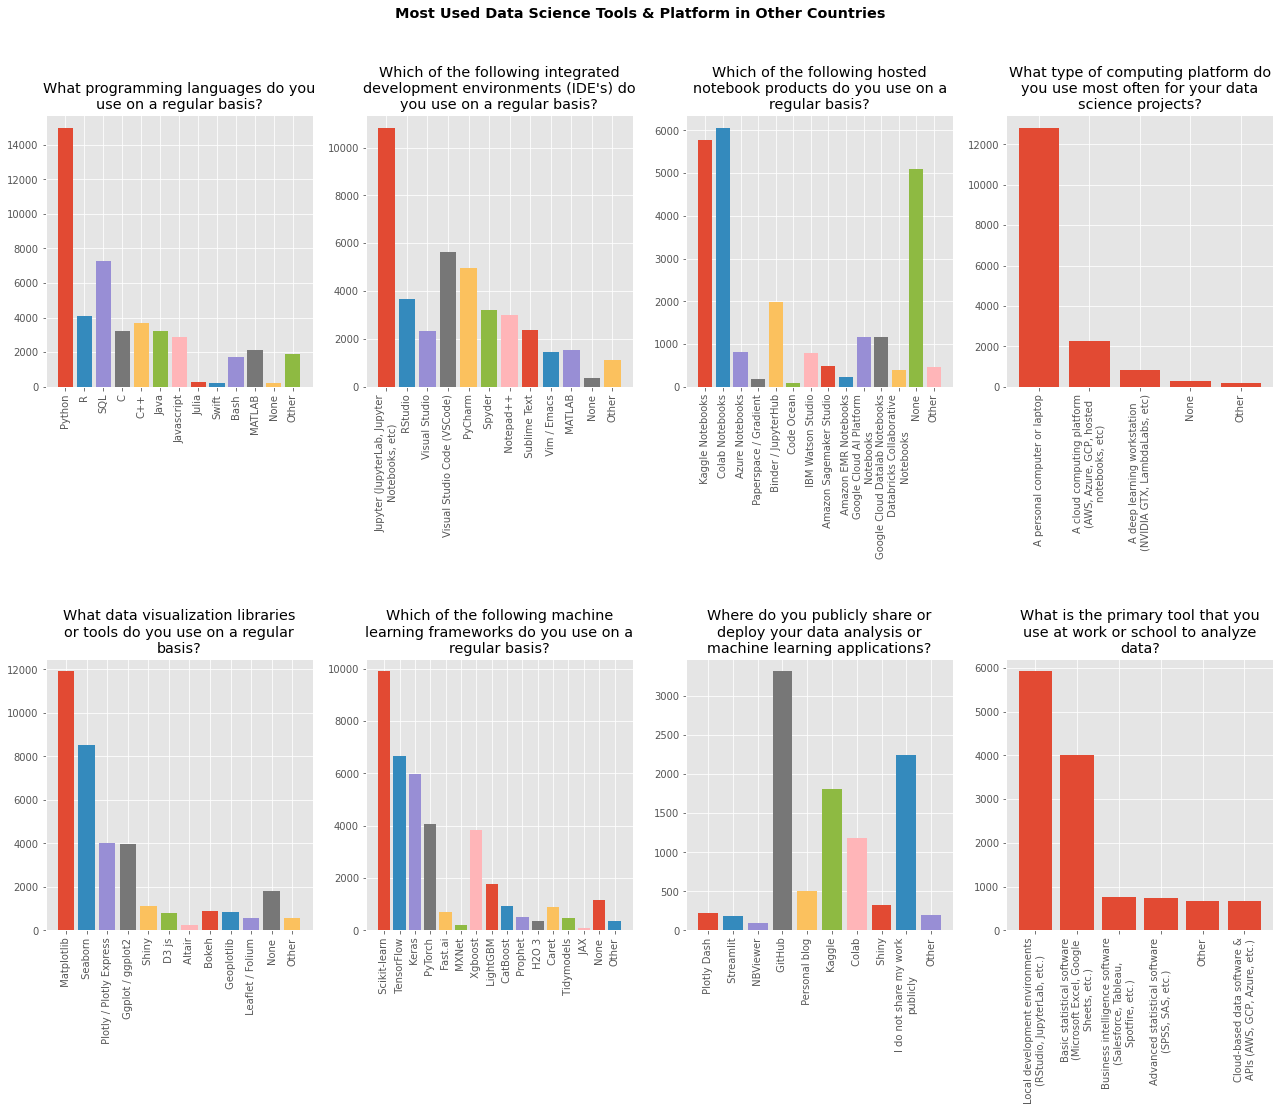

In [20]:
plot_most_used_tools(df_global, "Most Used Data Science Tools & Platform in Other Countries")

## For Aspiring Data Scientist in Indonesia

In [21]:
list_howto = ["Q8", "Q17", "Q18", "Q19", "Q23", "Q37", "Q39"]
list_howto_question_title = [
    "What programming language would you recommend an aspiring data scientist to learn first?",
    "Which of the following ML algorithms do you use on a regular basis?",
    "Which categories of computer vision methods do you use on a regular basis?",
    "Which of the following natural language processing (NLP) methods do you use on a regular basis?",
    "Important activities in your role at work",
    "On which platforms have you begun or completed data science courses?",
    "Who/what are your favorite media sources that report on data science topics?",
]
list_col_howto = [col for col in df_kaggle.columns if col.split("_")[0] in list_howto]
dict_howto_question_part = {
    howto: [col for col in list_col_howto if howto in col]
    for howto in list_howto
}

In [22]:
# utility function to sort multiple selection questions sorted by its value counts
def sort_multiple_selection(df, columns):
    return sorted(
        d := {
            col: df[col].value_counts().values[0]
            for col in columns
        },
        key=d.get,
        reverse=True
    )

# function to visualize recommendation for aspiring data scientist
def plot_aspiring_recommendation(df, title="", figsize=(22, 15), height_space=1.2):
    fig = plt.figure(figsize=figsize)
    for idx, question in enumerate(list_howto):
        columns = sort_multiple_selection(df, dict_howto_question_part[question])
        plt.subplot(2, 4, idx+1)
        for col in columns:
            plt.bar(
                x=[
                    textwrap.fill(label, 40)
                    for label in df[col].value_counts().index
                ],
                height=df[col].value_counts()
            )
            plt.xticks(rotation=90)
            plt.title(textwrap.fill(list_howto_question_title[idx], 35))
    plt.subplots_adjust(hspace=height_space)
    plt.suptitle(title, fontweight="bold", fontsize="x-large")
    plt.show()

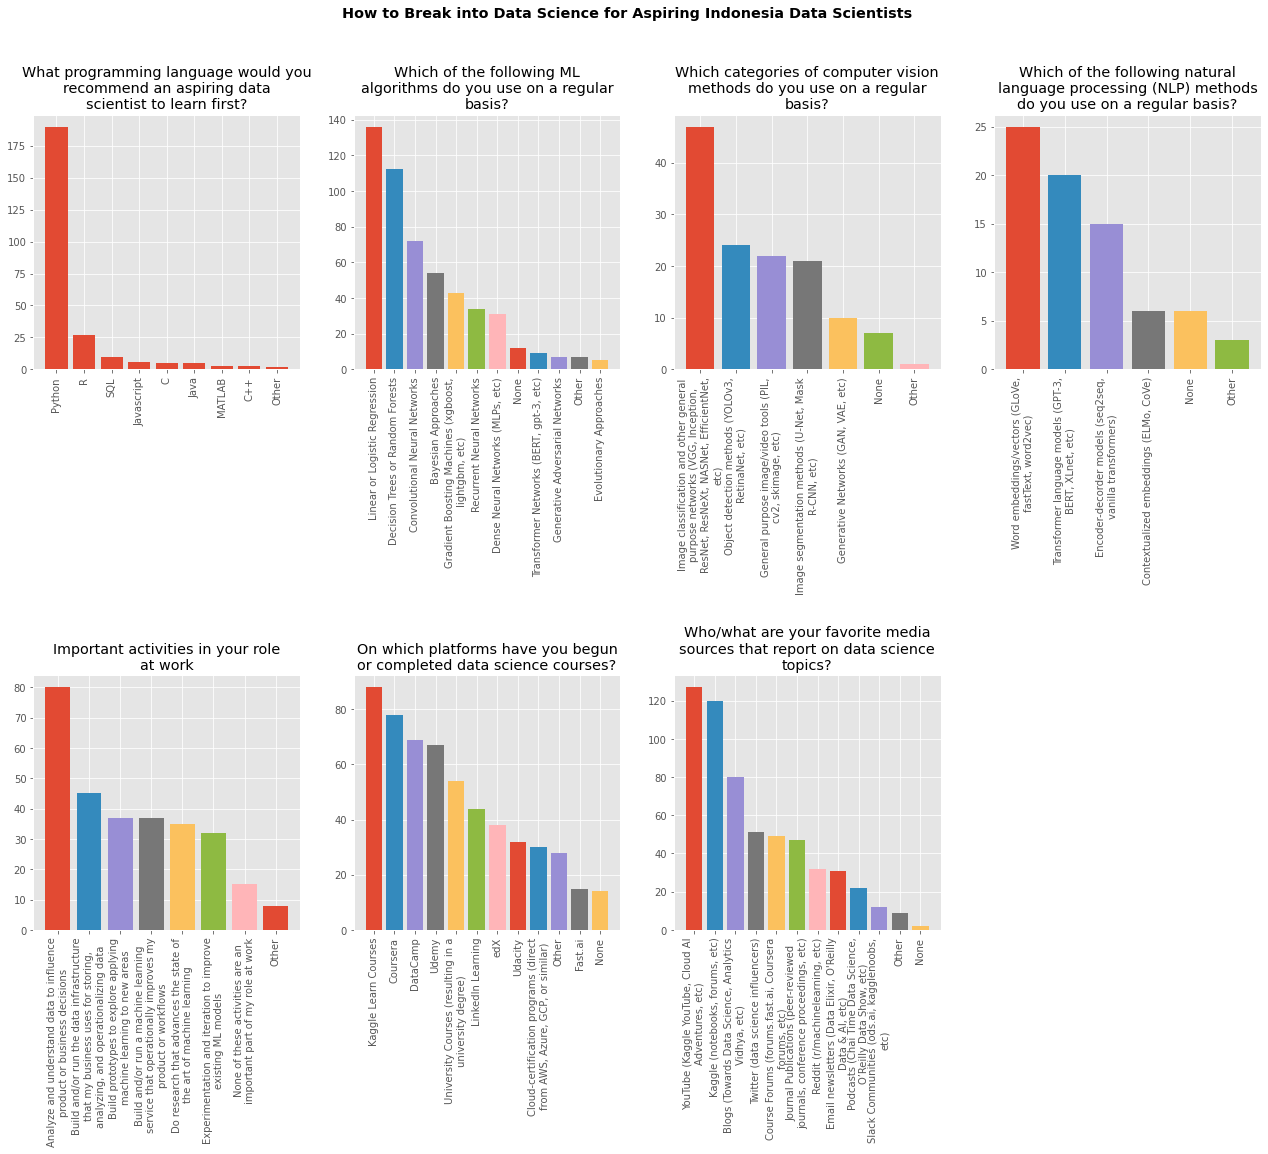

In [23]:
plot_aspiring_recommendation(df_indonesia, "How to Break into Data Science for Aspiring Indonesia Data Scientists")

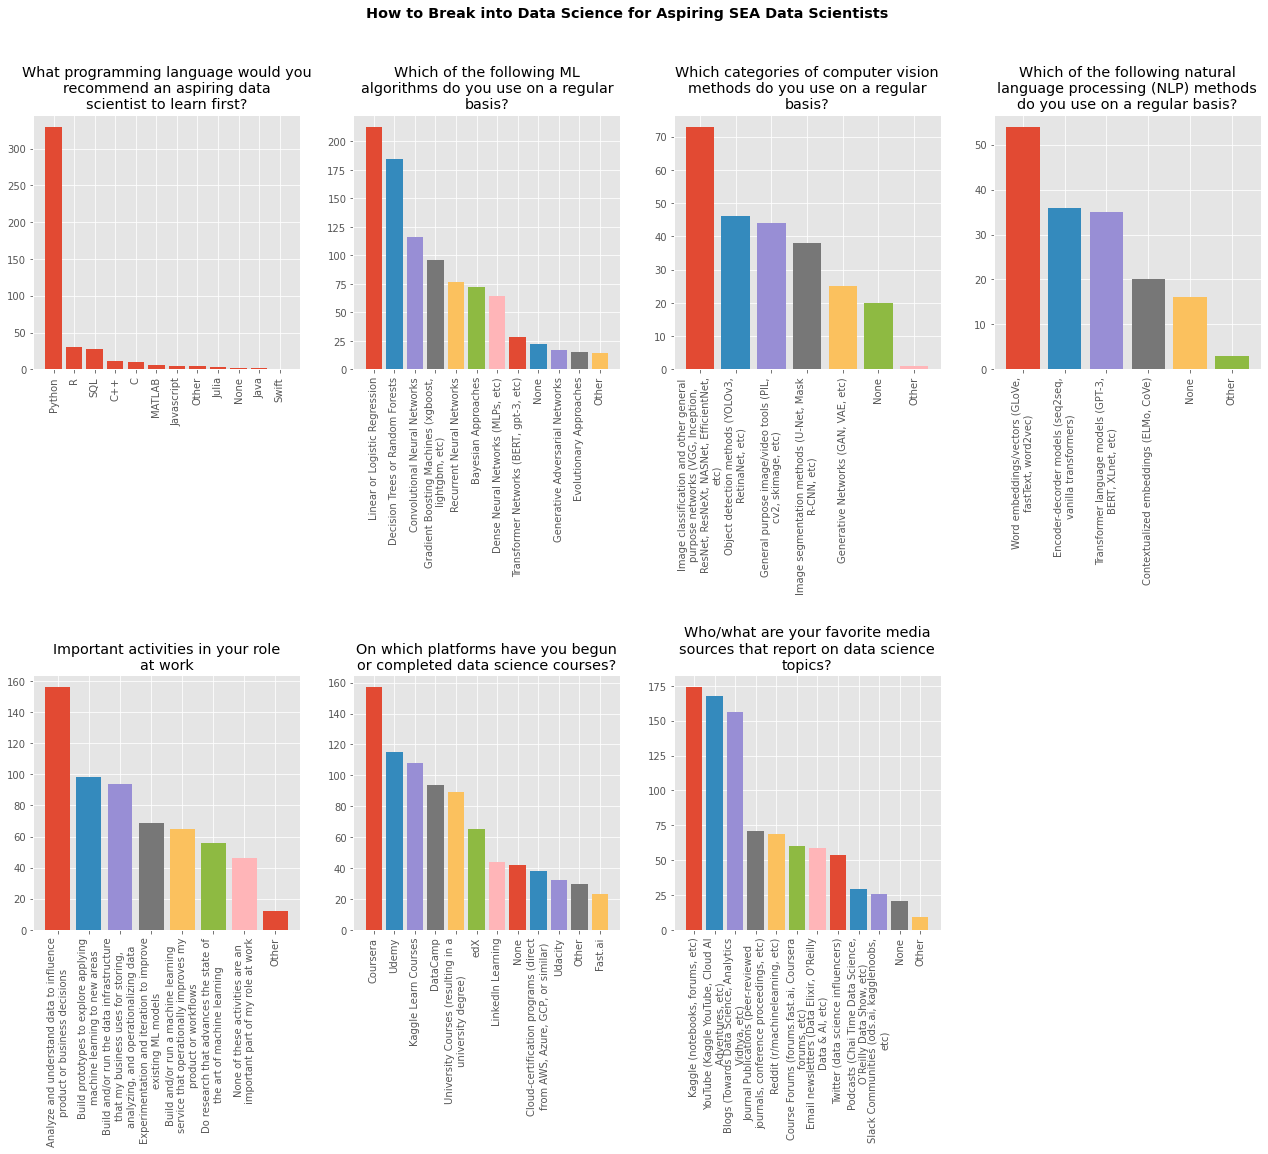

In [24]:
plot_aspiring_recommendation(df_sea, "How to Break into Data Science for Aspiring SEA Data Scientists")

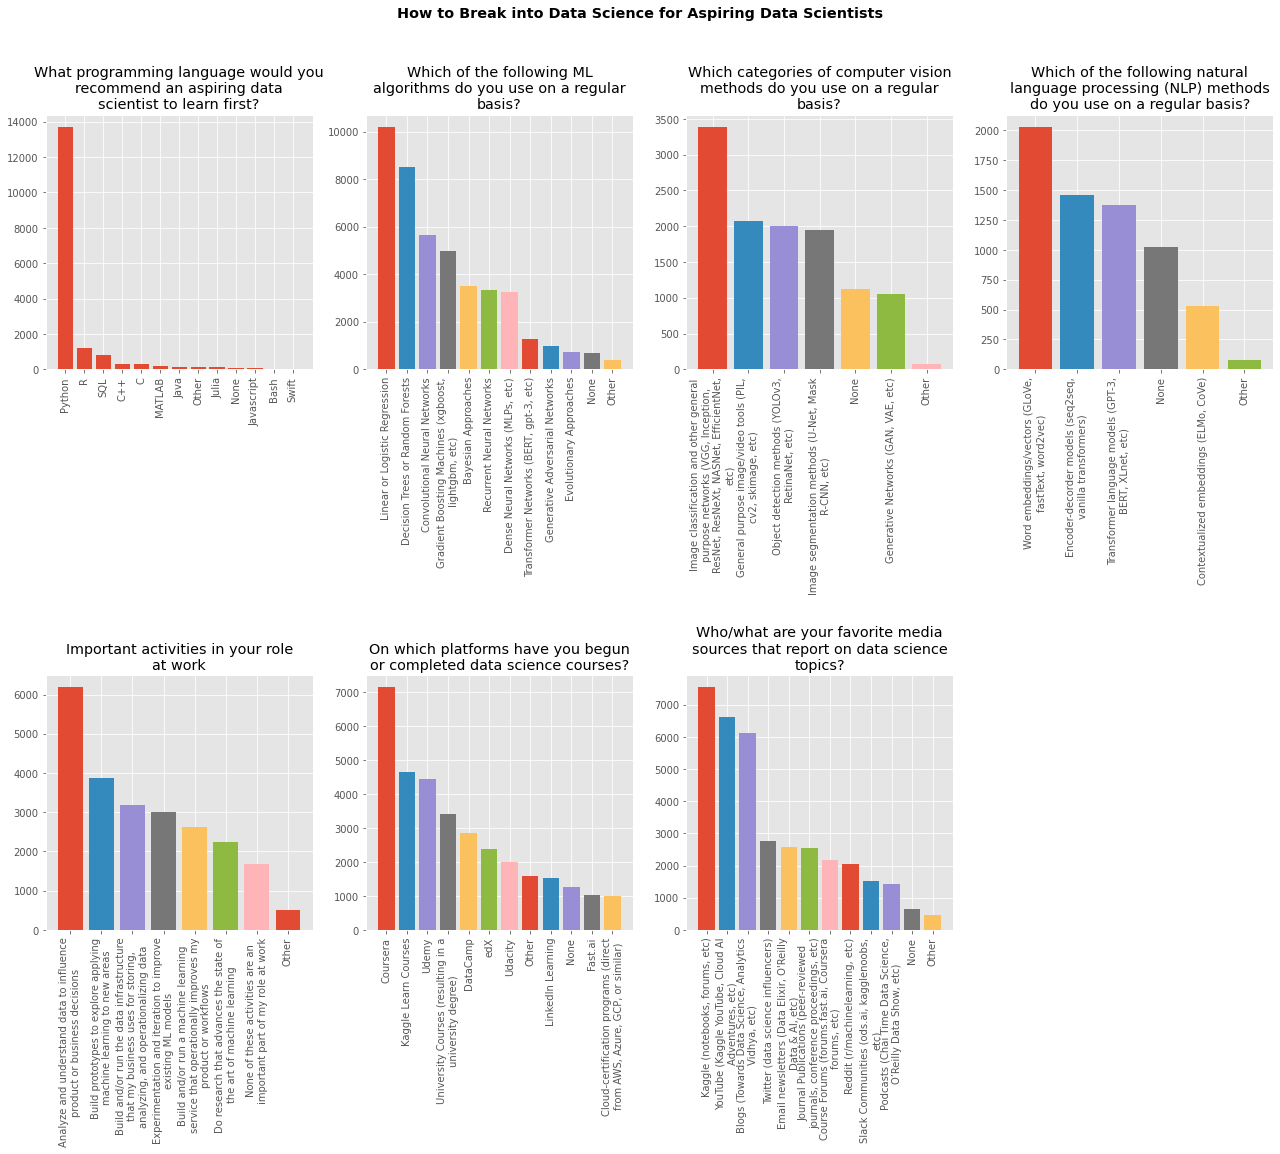

In [25]:
plot_aspiring_recommendation(df_global, "How to Break into Data Science for Aspiring Data Scientists")